# Task Assigned by Technocolabs


# SENTIMENT ANALYSIS ON AMAZON REVIEWS
**By**


Abhishek De

Chaitra Bellur

Kotha Lokesh

Prashant Srivastava

Rahul Roy

Sanurhanaan Shaikh

## Importing Libraries

In [44]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

%matplotlib inline

In [10]:
pip install mlxtend  

Note: you may need to restart the kernel to use updated packages.


# Loading Dataset

In [11]:
df1 = pd.read_csv("data/1429_1.csv")
df2 = pd.read_csv("data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv")
df3 = pd.read_csv("data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv")
df = pd.concat([df1, df2, df3])
print(len(df1), len(df2), len(df3))
print("Total Rows in dataframe:", len(df))

34660 5000 28332
Total Rows in dataframe: 67992


In [12]:
df.head(2)

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,dateAdded,dateUpdated,primaryCategories,imageURLs,manufacturerNumber,sourceURLs
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,Kindle,NaN,NaN,Adapter,NaN,NaN,NaN,NaN,NaN,NaN
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,very fast,NaN,NaN,truman,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
data = df[['id', 'name', 'asins', 'categories', 'reviews.rating', 'reviews.text', 'reviews.date', 'reviews.doRecommend']]
data.describe(include=object)

,id,name,asins,categories,reviews.text,reviews.date,reviews.doRecommend
count,67992,61232,67990,67992,67991,67953,55152
unique,92,125,94,111,46909,1451,2
top,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,"Fire Tablets,Tablets,Computers & Tablets,All T...",good,2017-01-23T00:00:00.000Z,True
freq,10966,10966,10966,10966,61,1314,52800


# Exploratory Data Analysis (EDA)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67992 entries, 0 to 28331
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   67992 non-null  object 
 1   name                 61232 non-null  object 
 2   asins                67990 non-null  object 
 3   categories           67992 non-null  object 
 4   reviews.rating       67959 non-null  float64
 5   reviews.text         67991 non-null  object 
 6   reviews.date         67953 non-null  object 
 7   reviews.doRecommend  55152 non-null  object 
dtypes: float64(1), object(7)
memory usage: 4.7+ MB


In [15]:
data['reviews.date'] = pd.to_datetime(data['reviews.date'])

<ipython-input-15-6582acaae69d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['reviews.date'] = pd.to_datetime(data['reviews.date'])


In [16]:
data["reviews.doRecommend"].fillna("Neutral", inplace = True)

D:\Anaconda\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [17]:
data.shape

(67992, 8)

In [18]:
data.isnull().sum()

id                        0
name                   6760
asins                     2
categories                0
reviews.rating           33
reviews.text              1
reviews.date             39
reviews.doRecommend       0
dtype: int64

In [19]:
print("\nTotal number of reviews: ",len(data))
print("\nTotal number of asins: ", len(list(set(data['asins']))))
print("\nTotal number of unique products: ", len(list(set(data['name']))))
print("\nTotal number of unique categories: ", len(list(set(data['categories']))))


Total number of reviews:  67992

Total number of asins:  95

Total number of unique products:  2018

Total number of unique categories:  111


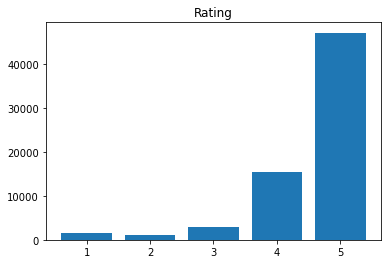

In [20]:
counts = data['reviews.rating'].value_counts()
plt.bar(counts.index, counts.values)
plt.title("Rating")
plt.show()

In [21]:
pd.crosstab(data['name'], data['reviews.rating'])

reviews.rating,1.0,2.0,3.0,4.0,5.0
name,,,,,
"All-New Fire 7 Tablet with Alexa, 7"" Display, 8 GB - Marine Blue",1,1,2,23,55
"All-New Fire HD 8 Kids Edition Tablet, 8 HD Display, 32 GB, Blue Kid-Proof Case",4,5,10,35,179
"All-New Fire HD 8 Kids Edition Tablet, 8 HD Display, 32 GB, Pink Kid-Proof Case",3,3,11,62,214
"All-New Fire HD 8 Tablet with Alexa, 8 HD Display, 16 GB, Marine Blue - with Special Offers",5,10,45,232,591
"All-New Fire HD 8 Tablet with Alexa, 8 HD Display, 32 GB, Marine Blue - with Special Offers",5,0,2,40,113
...,...,...,...,...,...
"Kindle Voyage E-reader, 6 High-Resolution Display (300 ppi) with Adaptive Built-in Light, PagePress Sensors, Wi-Fi - Includes Special Offers,",2,2,14,107,455
"New Amazon Kindle Fire Hd 9w Powerfast Adapter Charger + Micro Usb Angle Cable,,,\r\n",0,0,0,0,1
"New Amazon Kindle Fire Hd 9w Powerfast Adapter Charger + Micro Usb Angle Cable,,,\r\nNew Amazon Kindle Fire Hd 9w Powerfast Adapter Charger + Micro Usb Angle Cable,,,",0,0,2,1,3


# Data Cleaning

In [22]:
data=data.dropna()

In [23]:
data = data.drop_duplicates()

In [24]:
data = data.reset_index(drop=True)

In [25]:
data.head()

,id,name,asins,categories,reviews.rating,reviews.text,reviews.date,reviews.doRecommend
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",5.0,This product so far has not disappointed. My c...,2017-01-13 00:00:00+00:00,True
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",5.0,great for beginner or experienced person. Boug...,2017-01-13 00:00:00+00:00,True
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",5.0,Inexpensive tablet for him to use and learn on...,2017-01-13 00:00:00+00:00,True
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",4.0,I've had my Fire HD 8 two weeks now and I love...,2017-01-13 00:00:00+00:00,True
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",5.0,I bought this for my grand daughter when she c...,2017-01-12 00:00:00+00:00,True


In [26]:
data.shape

(59804, 8)

In [27]:

data["reviews.rating"].unique()

array([5., 4., 2., 1., 3.])

In [28]:
data["asins"].unique()

array(['B01AHB9CN2', 'B00VINDBJK', 'B005PB2T0S', 'B01AHB9CYG',
       'B01AHB9C1E', 'B01J2G4VBG', 'B00ZV9PXP2', 'B018Y229OU',
       'B00REQKWGA', 'B00IOYAM4I', 'B018T075DC', 'B018Y225IA',
       'B005PB2T2Q', 'B018Y23MNM', 'B00OQVZDJM', 'B00IOY8XWQ',
       'B00QJDU3KY', 'B018Y22C2Y', 'B01BFIBRIE', 'B01J4ORNHU',
       'B018SZT3BK', 'B00UH4D8G2', 'B018Y22BI4', 'B00TSUGXKE',
       'B00L9EPT8O,B01E6AO69U', 'B010CEHQTG', 'B01J24C0TI', 'B01N32NCPM',
       'B06XB29FPF', 'B00QFQRELG', 'B017JG41PC', 'B01AHBBG04',
       'B01AHBDCKQ', 'B01BH83OOM', 'B0189XYY0Q', 'B01ACEKAJY',
       'B018Y224PY', 'B00QWO9P0O,B00LH3DMUO', 'B00DIHVMEA,B00EZ1ZTV0',
       'B01E6AO69U,B00L9EPT8O', 'B073SQYXTW', 'B00ZV9RDKK',
       'B00QWO9P0O,B01IB83NZG,B00MNV8E0C', 'B00WRDS8H0',
       'B00EEBS9O0,B01CHQHIJK', 'B01B66989K,B00CD8ADKO,B00LA9H6UM',
       'B00DUGZFWY', 'B00F5CKWBA,B00KPQCWAU',
       'B0002LCUZK,B010CEC6MI,B01B25NN64', 'B074MCBG25,B075357QFB',
       'B006GWO7UA', 'B01L7XWEQQ', 'B006BGZJJ4', 'B0

In [29]:
print("\nTotal number of unique asins: ", len(list(set(df['asins']))))


Total number of unique asins:  95


In [30]:
year = data['reviews.date'].dt.year
data['year']=year
data['year'].unique()

array([2017, 2016, 2011, 2015, 2012, 2014, 2018, 2019, 2013, 2009],
      dtype=int64)

In [31]:
month = data['reviews.date'].dt.month
data['month']=month
data['month'].unique()

array([ 1,  2,  3,  6, 12,  5, 11,  4, 10,  8,  7,  9], dtype=int64)

In [32]:
days = data['reviews.date'].dt.date
data['date']=days
data['date'].unique()

array([datetime.date(2017, 1, 13), datetime.date(2017, 1, 12),
       datetime.date(2017, 1, 23), ..., datetime.date(2009, 5, 27),
       datetime.date(2009, 10, 11), datetime.date(2011, 9, 23)],
      dtype=object)

In [33]:
data.drop(['reviews.date'], axis='columns', inplace=True)
data

,id,name,asins,categories,reviews.rating,reviews.text,reviews.doRecommend,year,month,date
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",5.0,This product so far has not disappointed. My c...,True,2017,1,2017-01-13
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",5.0,great for beginner or experienced person. Boug...,True,2017,1,2017-01-13
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",5.0,Inexpensive tablet for him to use and learn on...,True,2017,1,2017-01-13
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",4.0,I've had my Fire HD 8 two weeks now and I love...,True,2017,1,2017-01-13
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",5.0,I bought this for my grand daughter when she c...,True,2017,1,2017-01-12
...,...,...,...,...,...,...,...,...,...,...
59799,AVqkIhxunnc1JgDc3kg_,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",5.0,I got 2 of these for my 8 yr old twins. My 11 ...,True,2016,12,2016-12-07
59800,AVqkIhxunnc1JgDc3kg_,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",4.0,I bought this for my niece for a Christmas gif...,True,2017,1,2017-01-20
59801,AVqkIhxunnc1JgDc3kg_,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",5.0,"Very nice for light internet browsing, keeping...",True,2017,1,2017-01-30
59802,AVqkIhxunnc1JgDc3kg_,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",5.0,This Tablet does absolutely everything I want!...,True,2017,2,2017-02-17


In [34]:
data = data[['reviews.rating', 'reviews.text']]

# Data Processing

In [35]:
amazon_data_pos= data[data["reviews.rating"].isin([4,5])]
amazon_data_neg= data[data["reviews.rating"].isin([1,2,3])]
data['reviews.rating'].value_counts()

5.0    41149
4.0    13709
3.0     2624
1.0     1328
2.0      994
Name: reviews.rating, dtype: int64

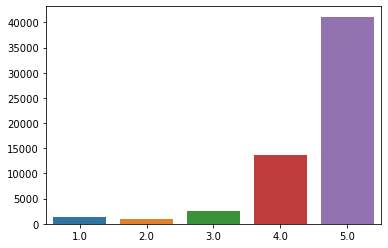

In [36]:
sns.barplot(x=data['reviews.rating'].value_counts().index,y=data['reviews.rating'].value_counts().values)

In [37]:
model_data=pd.concat([amazon_data_pos[:5000],amazon_data_neg[:5000]])
model_data.shape

(9946, 2)

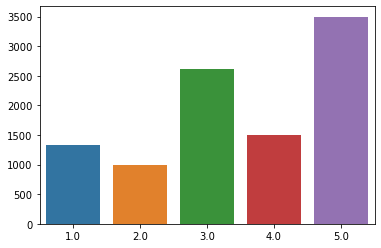

In [38]:
sns.barplot(x=model_data['reviews.rating'].value_counts().index,y=model_data['reviews.rating'].value_counts().values)

In [39]:
model_data['sentiment']=1
model_data["sentiment"][model_data["reviews.rating"].isin([1,2,3])]= 0
model_data.head()

<ipython-input-39-f468d05b8bb0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data["sentiment"][model_data["reviews.rating"].isin([1,2,3])]= 0


,reviews.rating,reviews.text,sentiment
0,5.0,This product so far has not disappointed. My c...,1
1,5.0,great for beginner or experienced person. Boug...,1
2,5.0,Inexpensive tablet for him to use and learn on...,1
3,4.0,I've had my Fire HD 8 two weeks now and I love...,1
4,5.0,I bought this for my grand daughter when she c...,1


In [40]:
model_data.sentiment.value_counts()

1    5000
0    4946
Name: sentiment, dtype: int64

In [41]:
import string
def review_cleaning(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [42]:
model_data['reviews.rating']=model_data['reviews.rating'].apply(lambda x:review_cleaning(x))
model_data.head()

,reviews.rating,reviews.text,sentiment
0,,This product so far has not disappointed. My c...,1
1,,great for beginner or experienced person. Boug...,1
2,,Inexpensive tablet for him to use and learn on...,1
3,,I've had my Fire HD 8 two weeks now and I love...,1
4,,I bought this for my grand daughter when she c...,1


In [45]:
words_descriptions = model_data["reviews.text"].str.split()

stopword_list = stopwords.words('english')
ps = PorterStemmer()
words_descriptions = words_descriptions.apply(lambda elem: [word for word in elem if not word in stopword_list])
words_descriptions = words_descriptions.apply(lambda elem: [ps.stem(word) for word in elem])

model_data['reviews.text'] = words_descriptions.apply(lambda elem: ' '.join(elem))
model_data['reviews.text'].head()

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\abhi/nltk_data'
    - 'D:\\Anaconda\\nltk_data'
    - 'D:\\Anaconda\\share\\nltk_data'
    - 'D:\\Anaconda\\lib\\nltk_data'
    - 'C:\\Users\\abhi\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


# Testing and Training dataset

In [ ]:
y=model_data['sentiment']
X=model_data['reviews.text']

In [ ]:
X_train_data, X_test_data, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
count_vector=CountVectorizer(stop_words="english")
count_vector.fit(X_train_data)
print(count_vector.get_feature_names()[0:20])
print(count_vector.get_feature_names()[-20:])
X_train=count_vector.transform(X_train_data)
X_test=count_vector.transform(X_test_data)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix, classification_report, accuracy_score
from mlxtend.plotting import plot_decision_regions

# 1. Linear SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

# Create the SVM  
svm_linear = Pipeline([("clf_linearSVC", SVC(random_state=42, kernel='linear'))])

# Fit the data to the SVM classifier
svm_linear.fit(X_train, y_train)

# Generate predictions
Y_Pred_lin = svm_linear.predict(X_test)

#Accuracy
print('Train accuracy :', (svm_linear.score(X_train, y_train))*100)
print('Test accuracy :', (svm_linear.score(X_test, y_test))*100)

#confusion matrix
matrix = plot_confusion_matrix(svm_linear, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for linear SVM')
plt.show(matrix)
plt.show()

In [ ]:
print('Train accuracy :', (svm_linear.score(X_train, y_train))*100)
print('Test accuracy :', (svm_linear.score(X_test, y_test))*100)

In [ ]:
#confusion matrix
matrix = plot_confusion_matrix(svm_linear, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for linear SVM')
plt.show(matrix)
plt.show()

In [ ]:
print(classification_report(y_test, Y_Pred_lin))

# 2. Radial Basis Function SVM

In [ ]:
svm_rbf = Pipeline([("clf_rbfSVC", SVC(random_state=42, kernel='rbf'))])
svm_rbf.fit(X_train, y_train)
Y_Pred_rbf = svm_rbf.predict(X_test)

In [ ]:
print('Train accuracy :', (svm_rbf.score(X_train, y_train))*100)
print('Test accuracy :', (svm_rbf.score(X_test, y_test))*100)

In [ ]:
#confusion matrix
matrix = plot_confusion_matrix(svm_rbf, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for rbf SVM')
plt.show(matrix)
plt.show()

In [ ]:
print(classification_report(y_test, Y_Pred_rbf))

# Fine tuning For Classifier

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10], 
              'gamma': [1, 0.1, 0.01],
              'kernel': ['linear', 'rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

In [ ]:
grid_predictions = grid.best_estimator_.predict(X_test)

In [ ]:
#confusion matrix
matrix = plot_confusion_matrix(grid, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for rbf SVM')
plt.show(matrix)
plt.show()

In [ ]:
# print classification report
print(classification_report(y_test, grid_predictions))

In [ ]:
accur_values = {'Name': ['Linear SVM', 'Rbf SVM', 'Fine tuned SVM' ], 'Training Accuracy': [95.21116138763198, 93.31322272498743, 93.48919054801408], 'Test Accuracy': [84.77386934673366, 84.321608040201, 85.37688442211055] }

In [ ]:
accur = pd.DataFrame(accur_values)

In [ ]:
accur

In [ ]:
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(8, 8))

br1 = np.arange(3)
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

name = list(accur['Name'])
train = accur['Training Accuracy']
test = accur['Test Accuracy']

plt.bar(br1, train, width = barWidth,
        edgecolor ='grey', label ='Training Accuracy')
plt.bar(br2, test,  width = barWidth,
        edgecolor ='grey', label ='Test Accuracy')

plt.xlabel('Classifier', fontweight ='bold', fontsize = 15)
plt.ylabel('Accuracy (by precent)', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth*0.5 for r in range(3)],
        name)

plt.legend(bbox_to_anchor=(1.3, 0.5))
plt.show()

In [ ]:
import pickle

# save model
pickle.dump(grid.best_estimator_, open('model.pkl', 'wb'))
pickle.dump(count_vector, open('count_vector.pkl', 'wb'))

# load model
sentiment_model = pickle.load(open('model.pkl', 'rb'))
count_vec = pickle.load(open('count_vector.pkl', 'rb'))
# predict the output
y_pred = sentiment_model.predict(X_test)

# confusion matrix
print('Confusion matrix of Rbf model: \n',confusion_matrix(y_test, y_pred),'\n')

# show the accuracy
print('Accuracy of Rbf model = ',accuracy_score(y_test, y_pred))

In [ ]:
matrix = plot_confusion_matrix(sentiment_model, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for rbf SVM')
plt.show(matrix)
plt.show()